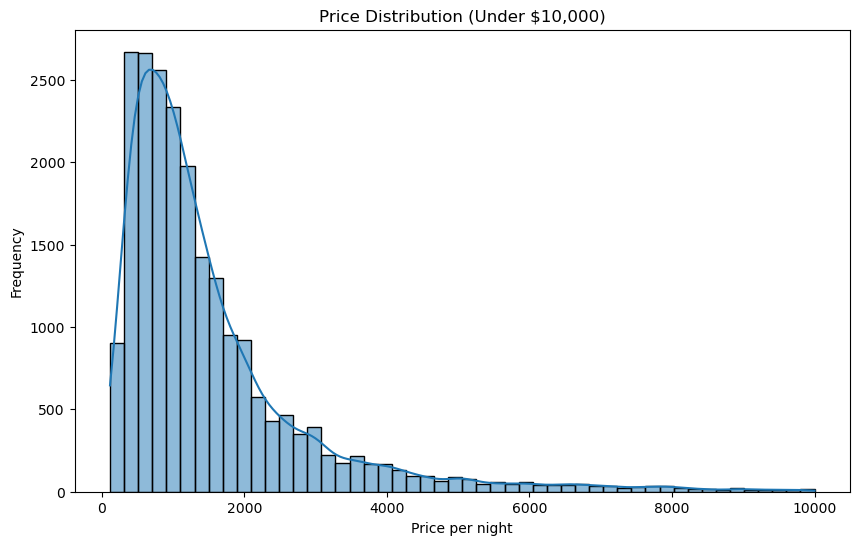

📉 MAE : 936.89


In [17]:
# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# 🔽  Load data
df = pd.read_csv('listings.csv', low_memory=False)

# 🧹  Clean prices
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)

# 🧼 Useful filters
df = df[df['price'] < 10000]  # Limpiar outliers extremos
df = df[df['price'] > 100]    # Filtrar precios ridículamente bajos

# 🔍 Subset of useful columns
subset = df[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews']]
subset = subset.dropna()

# 📊 Visualization
plt.figure(figsize=(10, 6))
sns.histplot(subset['price'], bins=50, kde=True)
plt.title("Price Distribution (Under $10,000)")
plt.xlabel("Price per night")
plt.ylabel("Frequency")
plt.show()

# 📈 Simple model: predict price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f"📉 MAE : {mae:.2f}")


Text(0.5, 1.0, 'Price vs. Number of Reviews')

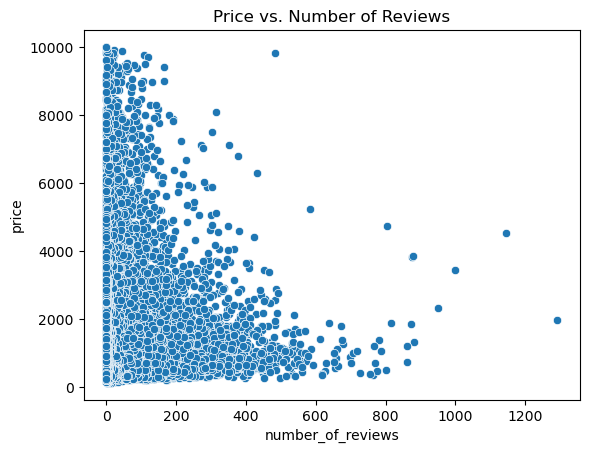

In [11]:
sns.scatterplot(data=subset, x='number_of_reviews', y='price')
plt.title("Price vs. Number of Reviews")


<Axes: title={'center': 'Average Price by Neighborhood'}, ylabel='neighbourhood'>

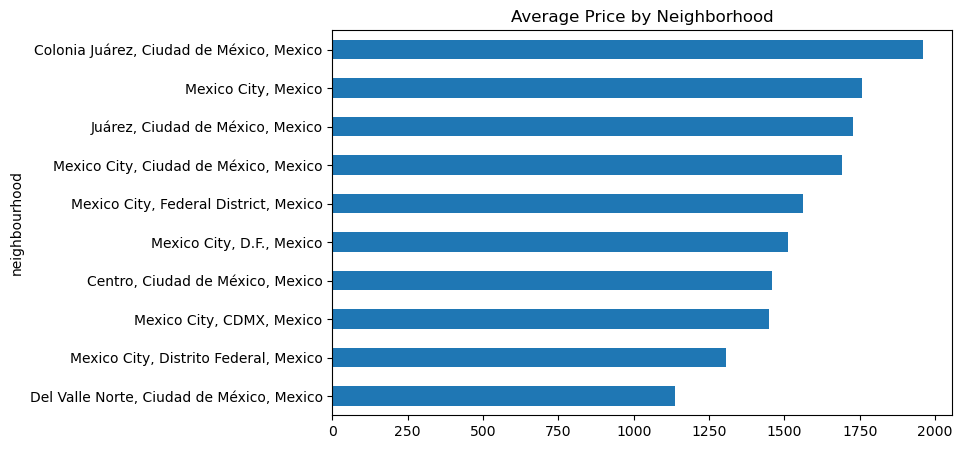

In [13]:
top_barrios = df['neighbourhood'].value_counts().head(10).index
df_barrios = df[df['neighbourhood'].isin(top_barrios)]
df_grouped = df_barrios.groupby('neighbourhood')['price'].mean().sort_values()

df_grouped.plot(kind='barh', figsize=(8,5), title='Average Price by Neighborhood')


Text(0.5, 1.0, 'Price Heatmap in Mexico City (CDMX)')

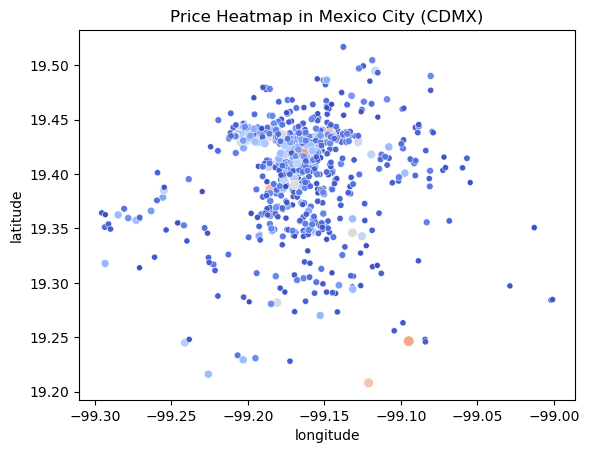

In [15]:
sns.scatterplot(data=subset.sample(1000), x='longitude', y='latitude', hue='price', palette='coolwarm', size='price', legend=False)
plt.title("Price Heatmap in Mexico City (CDMX)")